In [1]:
import numpy as np
import pandas as pd
import math
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sizes = np.array([20, 100])

(-1.795181288565154, -0.4438458457239676, 0.4291190239902927, 1.780454466831479)
(-1.2799432309284118, -0.1179990174384406, 0.2792079158585288, 1.4411521293485)
[-0.4438458457239676, -0.1179990174384406, 0.2792079158585288, 0.4291190239902927]
[0.7159292094965952, 0.8794555936106273, 1.1619442134899711, 1.3513354428411863]


,n,mean_min,mean_max,dev_min,dev_max
0,20,-0.443846,0.429119,0.715929,1.351335
1,100,-0.117999,0.279208,0.879456,1.161944


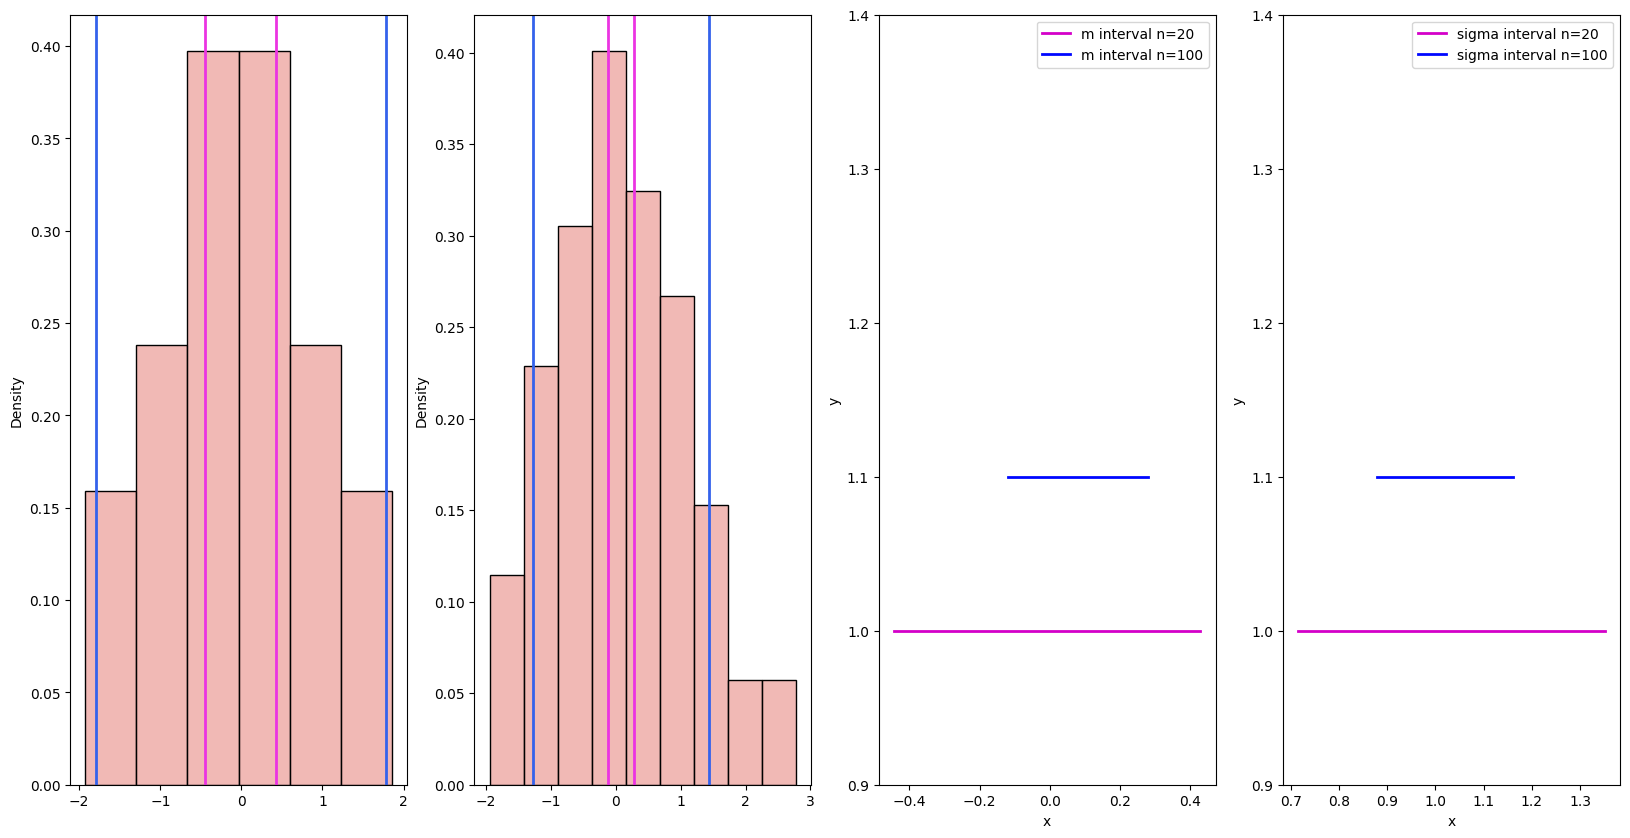

In [15]:
alpha = 0.05
confidence_level = 1 - alpha / 2 # 0.975

data = {
  'n': [],
  'mean_min': [],
  'mean_max': [],
  'dev_min': [],
  'dev_max': [],
}

figure, axes = plt.subplots(1, len(sizes) * 2, figsize=(20, 10))

ranges = []
means = []
devs = []

for index, n in enumerate(sizes):
  sample = np.random.normal(0, 1, n)
  mean = sample.mean()
  dev = np.std(sample)
  student_value = scipy.stats.t.ppf(confidence_level, n)
  chi_square_value_min = scipy.stats.chi2.ppf(1 - alpha / 2, n)
  chi_square_value_max = scipy.stats.chi2.ppf(alpha / 2, n)

  mean_min = mean - dev * student_value / math.sqrt(n)
  mean_max = mean + dev * student_value / math.sqrt(n)
  
  means.append(mean_min)
  means.append(mean_max)

  dev_min = math.sqrt(n) * dev / math.sqrt(chi_square_value_min)
  dev_max = math.sqrt(n) * dev / math.sqrt(chi_square_value_max)
  
  devs.append(dev_min)
  devs.append(dev_max)

  data['n'].append(n)
  data['mean_min'].append(mean_min)
  data['mean_max'].append(mean_max)
  data['dev_min'].append(dev_min)
  data['dev_max'].append(dev_max)

  sns.histplot(sample, ax=axes[index], stat='density', color='#eda29d')
  axes[index].axvline(x=mean_min, color='#eb34e2', linewidth=2)
  axes[index].axvline(x=mean_max, color='#eb34e2', linewidth=2)
  axes[index].axvline(x=mean_min - dev_max, color='#3462eb', linewidth=2)
  axes[index].axvline(x=mean_max + dev_max, color='#3462eb', linewidth=2)
  
  ranges.append((mean_min - dev_max, mean_min, mean_max, mean_max + dev_max))

sns.lineplot(x='x', y='y', data={
  'x': np.array([data['mean_min'][0], data['mean_max'][0]]),
  'y': np.array([1, 1]),
}, ax=axes[2], color='#D400C9', label='m interval n=20', linewidth=2)
sns.lineplot(x='x', y='y', data={
  'x': np.array([data['mean_min'][1], data['mean_max'][1]]),
  'y': np.array([1.1, 1.1]),
}, ax=axes[2], color='#0007FF', label='m interval n=100', linewidth=2)
axes[2].set_ylim(0.9, 1.4)
axes[2].legend()

sns.lineplot(x='x', y='y', data={
  'x': np.array([data['dev_min'][0], data['dev_max'][0]]),
  'y': np.array([1, 1]),
}, ax=axes[3], color='#D400C9', label='sigma interval n=20', linewidth=2)
sns.lineplot(x='x', y='y', data={
  'x': np.array([data['dev_min'][1], data['dev_max'][1]]),
  'y': np.array([1.1, 1.1]),
}, ax=axes[3], color='#0007FF', label='sigma interval n=100', linewidth=2)
axes[3].set_ylim(0.9, 1.4)
axes[3].legend()

figure.savefig('plots/hists.png')

for tup in ranges:
  print(tup)
means.sort()
devs.sort()
print(means)
print(devs)

result_df = pd.DataFrame(data)
result_df.to_csv('results/normal.csv', index=False)
result_df



(-0.21150034483517693, 0.12033451514000809, 1.0541758287962621, 1.3860106887714472)
(-0.04069456881727379, 0.27443270759054683, 0.6716396408875163, 0.9867669172953368)
[0.12033451514000809, 0.27443270759054683, 0.6716396408875163, 1.0541758287962621]
[0.2602942754923587, 0.2658518893299602, 0.3151272764078206, 0.331834859975185]


,n,mean_min,mean_max,dev_min,dev_max
0,20,0.120335,1.054176,0.265852,0.331835
1,100,0.274433,0.671640,0.260294,0.315127


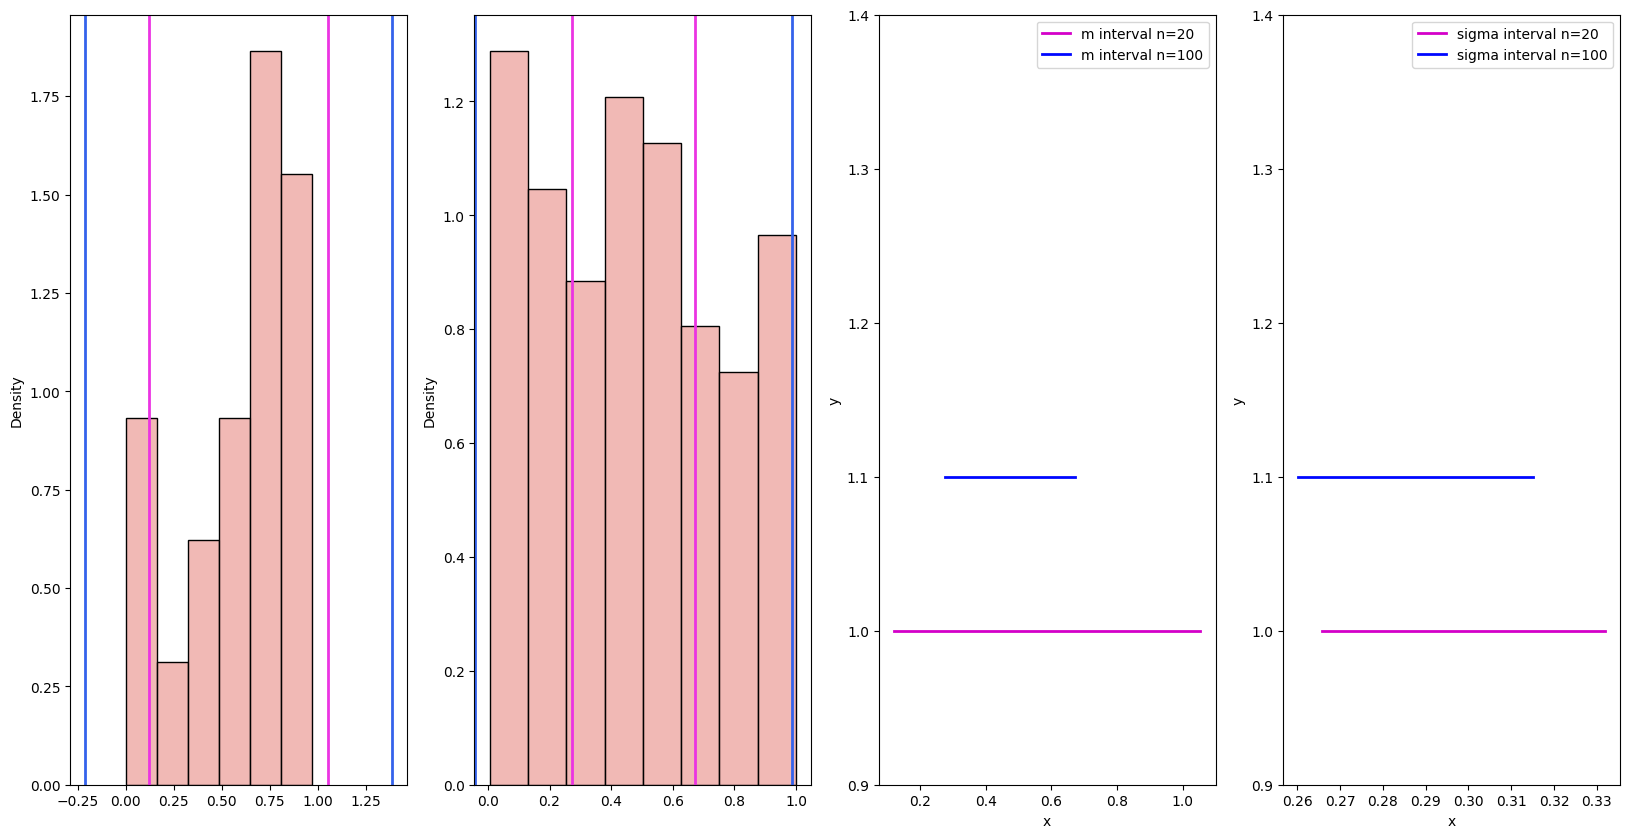

In [18]:
significance = 0.05
confidence_level = 1 - significance / 2 # 0.975

data = {
  'n': [],
  'mean_min': [],
  'mean_max': [],
  'dev_min': [],
  'dev_max': [],
}

figure, axes = plt.subplots(1, len(sizes) * 2, figsize=(20, 10))

ranges = []
means = []
devs = []

for index, n in enumerate(sizes):
  sample = np.random.random(n)
  mean = sample.mean()
  s = math.sqrt(((sample - mean) ** 2 / n).sum())
  m4 = ((sample - mean) ** 4).sum() / n
  e = m4 / s ** 4 - 3
  student_value = scipy.stats.t.ppf(confidence_level, n)

  dev_min = s * (1 - 0.5 * student_value * math.sqrt(e + 2) / 10)
  dev_max = s * (1 + 0.5 * student_value * math.sqrt(e + 2) / 10)
  devs.append(dev_min)
  devs.append(dev_max)

  mean_min = mean - dev * student_value / math.sqrt(n)
  mean_max = mean + dev * student_value / math.sqrt(n)
  means.append(mean_min)
  means.append(mean_max)
  
  ranges.append((mean_min - dev_max, mean_min, mean_max, mean_max + dev_max))

  data['n'].append(n)
  data['mean_min'].append(mean_min)
  data['mean_max'].append(mean_max)
  data['dev_min'].append(dev_min)
  data['dev_max'].append(dev_max)
  
  sns.histplot(sample, ax=axes[index], stat='density', color='#eda29d')
  axes[index].axvline(x=mean_min, color='#eb34e2', linewidth=2)
  axes[index].axvline(x=mean_max, color='#eb34e2', linewidth=2)
  axes[index].axvline(x=mean_min - dev_max, color='#3462eb', linewidth=2)
  axes[index].axvline(x=mean_max + dev_max, color='#3462eb', linewidth=2)

sns.lineplot(x='x', y='y', data={
  'x': np.array([data['mean_min'][0], data['mean_max'][0]]),
  'y': np.array([1, 1]),
}, ax=axes[2], color='#D400C9', label='m interval n=20', linewidth=2)
sns.lineplot(x='x', y='y', data={
  'x': np.array([data['mean_min'][1], data['mean_max'][1]]),
  'y': np.array([1.1, 1.1]),
}, ax=axes[2], color='#0007FF', label='m interval n=100', linewidth=2)
axes[2].set_ylim(0.9, 1.4)
axes[2].legend()

sns.lineplot(x='x', y='y', data={
  'x': np.array([data['dev_min'][0], data['dev_max'][0]]),
  'y': np.array([1, 1]),
}, ax=axes[3], color='#D400C9', label='sigma interval n=20', linewidth=2)
sns.lineplot(x='x', y='y', data={
  'x': np.array([data['dev_min'][1], data['dev_max'][1]]),
  'y': np.array([1.1, 1.1]),
}, ax=axes[3], color='#0007FF', label='sigma interval n=100', linewidth=2)
axes[3].set_ylim(0.9, 1.4)
axes[3].legend()

for tup in ranges:
  print(tup)
means.sort()
devs.sort()
print(means)
print(devs)

result_df = pd.DataFrame(data)
result_df.to_csv('results/random.csv', index=False)
result_df

In [8]:
for tup in ranges:
  print(tup)

(-1.6748042620392078, -0.4006309524450058, 0.42248705507550965, 1.6966603646697118)
(-1.39840191482962, -0.23583020430109114, 0.16159123686247356, 1.3241629473910024)
(-0.30774548161936055, -0.006049359891083572, 0.9282962659791297, 1.2299923877074068)
(-0.018970920404523528, 0.2872944328386688, 0.6847158740022334, 0.9909812272454257)
